In [106]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
#readin in data
df = pd.read_csv('/Users/charliefountain/Downloads/pgaTourData.csv')

In [110]:
df.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         2312 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway Percentage  1678 non-null   float64
 3   Year                2312 non-null   int64  
 4   Avg Distance        1678 non-null   float64
 5   gir                 1678 non-null   float64
 6   Average Putts       1678 non-null   float64
 7   Average Scrambling  1678 non-null   float64
 8   Average Score       1678 non-null   float64
 9   Points              2296 non-null   object 
 10  Wins                293 non-null    float64
 11  Top 10              1458 non-null   float64
 12  Average SG Putts    1678 non-null   float64
 13  Average SG Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64
 16  SG:ARG

In [112]:
df.shape

(2312, 18)

In [113]:
# Replace NaN with 0 in Top 10 
df['Top 10'].fillna(0, inplace=True)
df['Top 10'] = df['Top 10'].astype(int)

# Replace NaN with 0 in # of wins
df['Wins'].fillna(0, inplace=True)
df['Wins'] = df['Wins'].astype(int)

# Drop NaN values 
df.dropna(axis = 0, inplace=True)
# Change Rounds to int
df['Rounds'] = df['Rounds'].astype(int)

# Change Points to int 
df['Points'] = df['Points'].apply(lambda x: x.replace(',',''))
df['Points'] = df['Points'].astype(int)

# Remove the $ and commas in money 
df['Money'] = df['Money'].apply(lambda x: x.replace('$',''))
df['Money'] = df['Money'].apply(lambda x: x.replace(',',''))
df['Money'] = df['Money'].astype(float)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1674 entries, 0 to 1677
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         1674 non-null   object 
 1   Rounds              1674 non-null   int64  
 2   Fairway Percentage  1674 non-null   float64
 3   Year                1674 non-null   int64  
 4   Avg Distance        1674 non-null   float64
 5   gir                 1674 non-null   float64
 6   Average Putts       1674 non-null   float64
 7   Average Scrambling  1674 non-null   float64
 8   Average Score       1674 non-null   float64
 9   Points              1674 non-null   int64  
 10  Wins                1674 non-null   int64  
 11  Top 10              1674 non-null   int64  
 12  Average SG Putts    1674 non-null   float64
 13  Average SG Total    1674 non-null   float64
 14  SG:OTT              1674 non-null   float64
 15  SG:APR              1674 non-null   float64
 16  SG:ARG

In [115]:
df.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,2680487.0
1,Ryan Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,1,3,-0.058,0.337,-0.012,0.213,0.194,2485203.0
2,Chez Reavie,93,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020,0,3,0.192,0.674,0.183,0.437,-0.137,2700018.0
3,Ryan Moore,78,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0,5,-0.271,0.941,0.406,0.532,0.273,1986608.0
4,Brian Stuard,103,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0,3,0.164,0.062,-0.227,0.099,0.026,1089763.0


In [117]:
df.describe()

,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
count,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1.674000e+03
mean,78.769415,61.448614,2014.002987,290.786081,65.667103,29.163542,58.120687,70.922877,631.125448,0.206691,2.337515,0.025408,0.147527,0.037019,0.065192,0.020192,1.488682e+06
std,14.241512,5.057758,2.609352,8.908379,2.743211,0.518966,3.386783,0.698738,452.741472,0.516601,2.060691,0.344145,0.695400,0.379702,0.380895,0.223493,1.410333e+06
min,45.000000,43.020000,2010.000000,266.400000,53.540000,27.510000,44.010000,68.698000,3.000000,0.000000,0.000000,-1.475000,-3.209000,-1.717000,-1.680000,-0.930000,2.465000e+04
25%,69.000000,57.955000,2012.000000,284.900000,63.832500,28.802500,55.902500,70.494250,322.000000,0.000000,1.000000,-0.187750,-0.260250,-0.190250,-0.180000,-0.123000,5.656412e+05
50%,80.000000,61.435000,2014.000000,290.500000,65.790000,29.140000,58.290000,70.904500,530.000000,0.000000,2.000000,0.040000,0.147000,0.055000,0.081000,0.022500,1.046144e+06
75%,89.000000,64.910000,2016.000000,296.375000,67.587500,29.520000,60.420000,71.343750,813.750000,0.000000,3.000000,0.258500,0.568500,0.287750,0.314500,0.175750,1.892478e+06
max,120.000000,76.880000,2018.000000,319.700000,73.520000,31.000000,69.330000,74.400000,4169.000000,5.000000,14.000000,1.130000,2.406000,1.485000,1.533000,0.660000,1.203046e+07


/Users/charliefountain/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/charliefountain/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/charliefountain/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

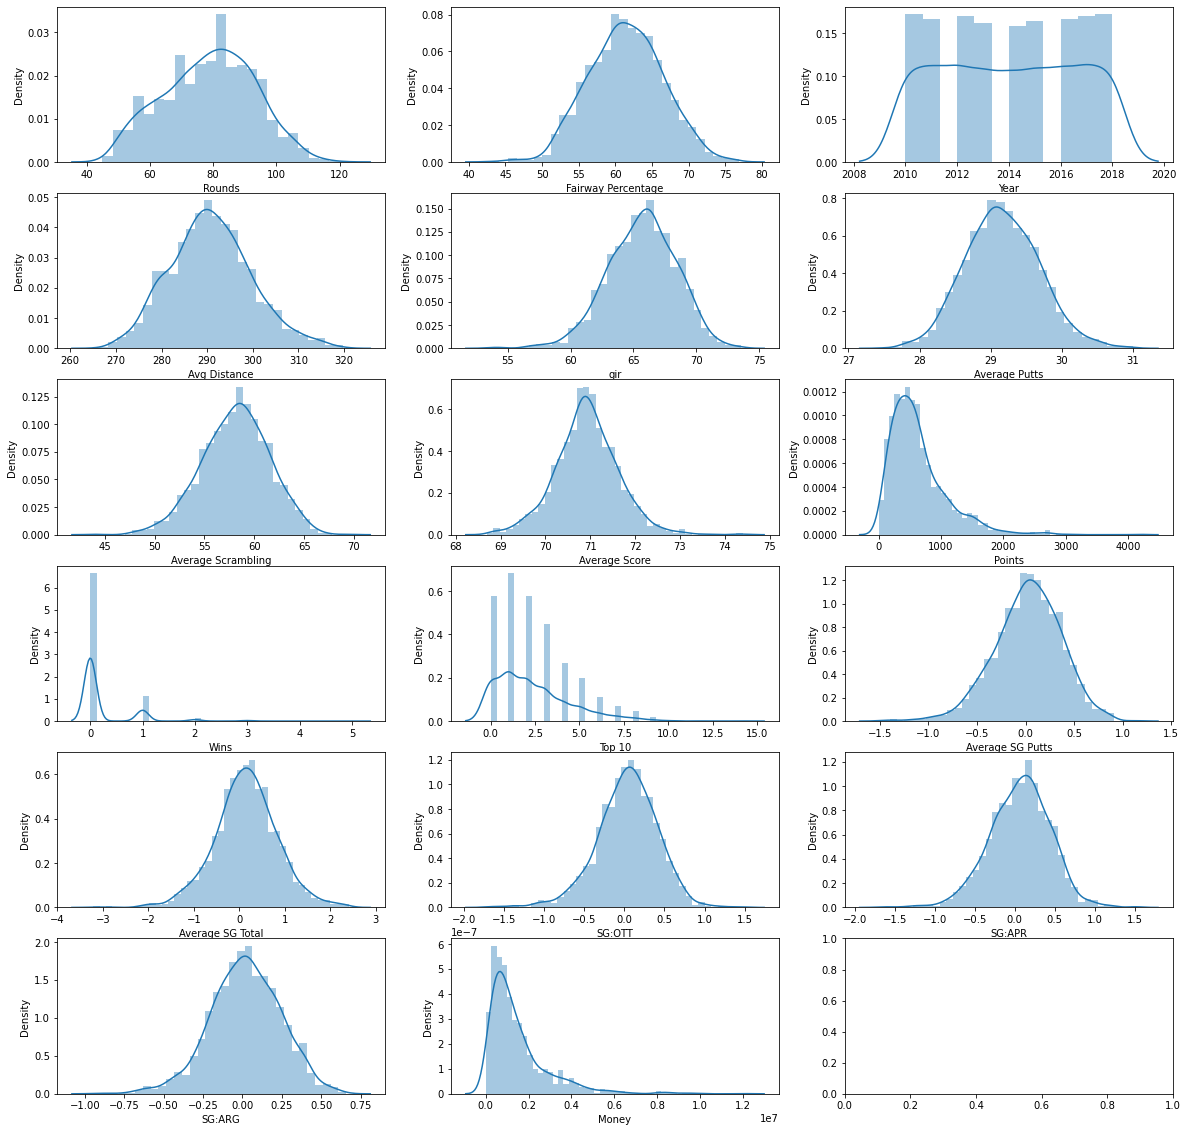

In [119]:
#Exploratory Data Analysis/ looking at distrubition
f, ax = plt.subplots(nrows = 6, ncols = 3, figsize=(20,20))
distribution = df.loc[:,df.columns!='Player Name'].columns
rows = 0
cols = 0
for i, column in enumerate(distribution):
    p = sns.distplot(df[column], ax=ax[rows][cols])
    cols += 1
    if cols == 3:
        cols = 0
        rows += 1

In [128]:
#Number of wins per player
win = df.groupby('Year')['Wins'].value_counts()
win = win.unstack()
win.fillna(0, inplace=True)

# Converting win into ints
win = win.astype(int)

print(win)

Wins    0   1  2  3  4  5
Year                     
2010  166  21  5  0  0  0
2011  156  25  5  0  0  0
2012  159  26  4  1  0  0
2013  152  24  3  0  0  1
2014  142  29  3  2  0  0
2015  150  29  2  1  1  0
2016  152  28  4  1  0  0
2017  156  30  0  3  1  0
2018  158  26  5  3  0  0


In [129]:
# Who made the most money
money_ranking = df[['Year','Player Name','Money']].copy()
money_ranking.sort_values(by='Money', inplace=True, ascending=False)
print(money_ranking.head())

     Year     Player Name       Money
647  2015   Jordan Spieth  12030465.0
361  2017   Justin Thomas   9921560.0
303  2017   Jordan Spieth   9433033.0
729  2015       Jason Day   9403330.0
520  2016  Dustin Johnson   9365185.0


In [130]:
#Who made the most each year
money_rank = money_ranking.groupby('Year')['Money'].max()
money_rank = pd.DataFrame(money_rank)
print(money_rank.iloc[0,0])

indexs = np.arange(2010, 2018)
names = []
for i in range(money_rank.shape[0]):
    temp = df.loc[df['Money'] == money_rank.iloc[i,0],'Player Name']
    names.append(str(temp.values[0]))

money_rank['Player Name'] = names
print(money_rank)

4910477.0
           Money     Player Name
Year                            
2010   4910477.0     Matt Kuchar
2011   6683214.0     Luke Donald
2012   8047952.0    Rory McIlroy
2013   8553439.0     Tiger Woods
2014   8280096.0    Rory McIlroy
2015  12030465.0   Jordan Spieth
2016   9365185.0  Dustin Johnson
2017   9921560.0   Justin Thomas
2018   8694821.0   Justin Thomas


In [131]:
df

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,2680487.0
1,Ryan Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,1,3,-0.058,0.337,-0.012,0.213,0.194,2485203.0
2,Chez Reavie,93,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020,0,3,0.192,0.674,0.183,0.437,-0.137,2700018.0
3,Ryan Moore,78,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0,5,-0.271,0.941,0.406,0.532,0.273,1986608.0
4,Brian Stuard,103,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0,3,0.164,0.062,-0.227,0.099,0.026,1089763.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,Phil Mickelson,76,52.66,2010,299.1,65.13,28.79,61.84,69.966,1629,1,5,-0.147,1.001,0.185,0.738,0.228,3821733.0
1674,John Daly,63,52.21,2010,305.7,65.66,29.78,53.53,71.697,97,0,0,-0.653,-0.989,0.336,-0.374,-0.298,158587.0
1675,Jimmy Walker,82,51.29,2010,292.9,65.88,29.14,58.46,70.953,554,0,2,0.252,0.093,-0.538,0.336,0.047,937987.0
1676,Daniel Chopra,74,51.27,2010,295.9,61.64,28.88,56.16,72.194,142,0,0,0.361,-1.096,-0.307,-1.070,-0.084,311405.0


In [139]:
#Turning money column into 0 and 1
df['Money'] = pd.to_numeric(df.Money, errors='coerce')
df['new_money'] = df['Money'] > 500000
df["new_money"] = df["new_money"].astype(int)

In [140]:
df

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,new,new_money
0,Henrik Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,2680487.0,1,1
1,Ryan Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,1,3,-0.058,0.337,-0.012,0.213,0.194,2485203.0,1,1
2,Chez Reavie,93,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020,0,3,0.192,0.674,0.183,0.437,-0.137,2700018.0,1,1
3,Ryan Moore,78,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0,5,-0.271,0.941,0.406,0.532,0.273,1986608.0,1,1
4,Brian Stuard,103,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0,3,0.164,0.062,-0.227,0.099,0.026,1089763.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,Phil Mickelson,76,52.66,2010,299.1,65.13,28.79,61.84,69.966,1629,1,5,-0.147,1.001,0.185,0.738,0.228,3821733.0,1,1
1674,John Daly,63,52.21,2010,305.7,65.66,29.78,53.53,71.697,97,0,0,-0.653,-0.989,0.336,-0.374,-0.298,158587.0,0,0
1675,Jimmy Walker,82,51.29,2010,292.9,65.88,29.14,58.46,70.953,554,0,2,0.252,0.093,-0.538,0.336,0.047,937987.0,1,1
1676,Daniel Chopra,74,51.27,2010,295.9,61.64,28.88,56.16,72.194,142,0,0,0.361,-1.096,-0.307,-1.070,-0.084,311405.0,0,0


<AxesSubplot:>

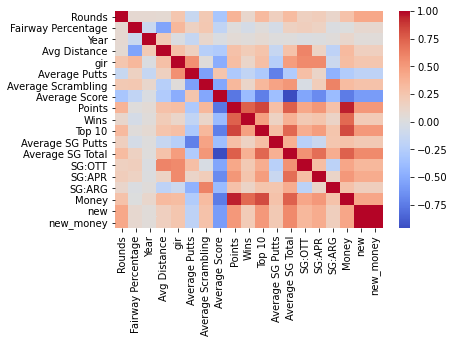

In [141]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='coolwarm')

In [142]:
df.corr()['Money']

Rounds                0.278091
Fairway Percentage    0.016237
Year                  0.108244
Avg Distance          0.329295
gir                   0.313770
Average Putts        -0.257832
Average Scrambling    0.317777
Average Score        -0.746499
Points                0.949286
Wins                  0.721665
Top 10                0.827215
Average SG Putts      0.278895
Average SG Total      0.747042
SG:OTT                0.441912
SG:APR                0.510740
SG:ARG                0.278901
Money                 1.000000
new                   0.445615
new_money             0.445615
Name: Money, dtype: float64

In [ ]:
# Imports
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

In [ ]:
y = df['salary']
# Features
X = df.drop('salary', axis=1)

In [ ]:
!pwd